In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Pumpkin_Seeds_Dataset.xlsx')
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [3]:
df.shape

(2500, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


From the above information we can tell that we dnt have any null values in the data

In [5]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


In [6]:
df.dtypes

Area                   int64
Perimeter            float64
Major_Axis_Length    float64
Minor_Axis_Length    float64
Convex_Area            int64
Equiv_Diameter       float64
Eccentricity         float64
Solidity             float64
Extent               float64
Roundness            float64
Aspect_Ration        float64
Compactness          float64
Class                 object
dtype: object

In [7]:
df[df.duplicated(keep = False)]

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class


In [8]:
df['Class'].unique()

array(['Çerçevelik', 'Ürgüp Sivrisi'], dtype=object)

from the above chart we can observe that the data is normally distributed. and we dnt have any skeweness in the data

C:\Users\sai\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


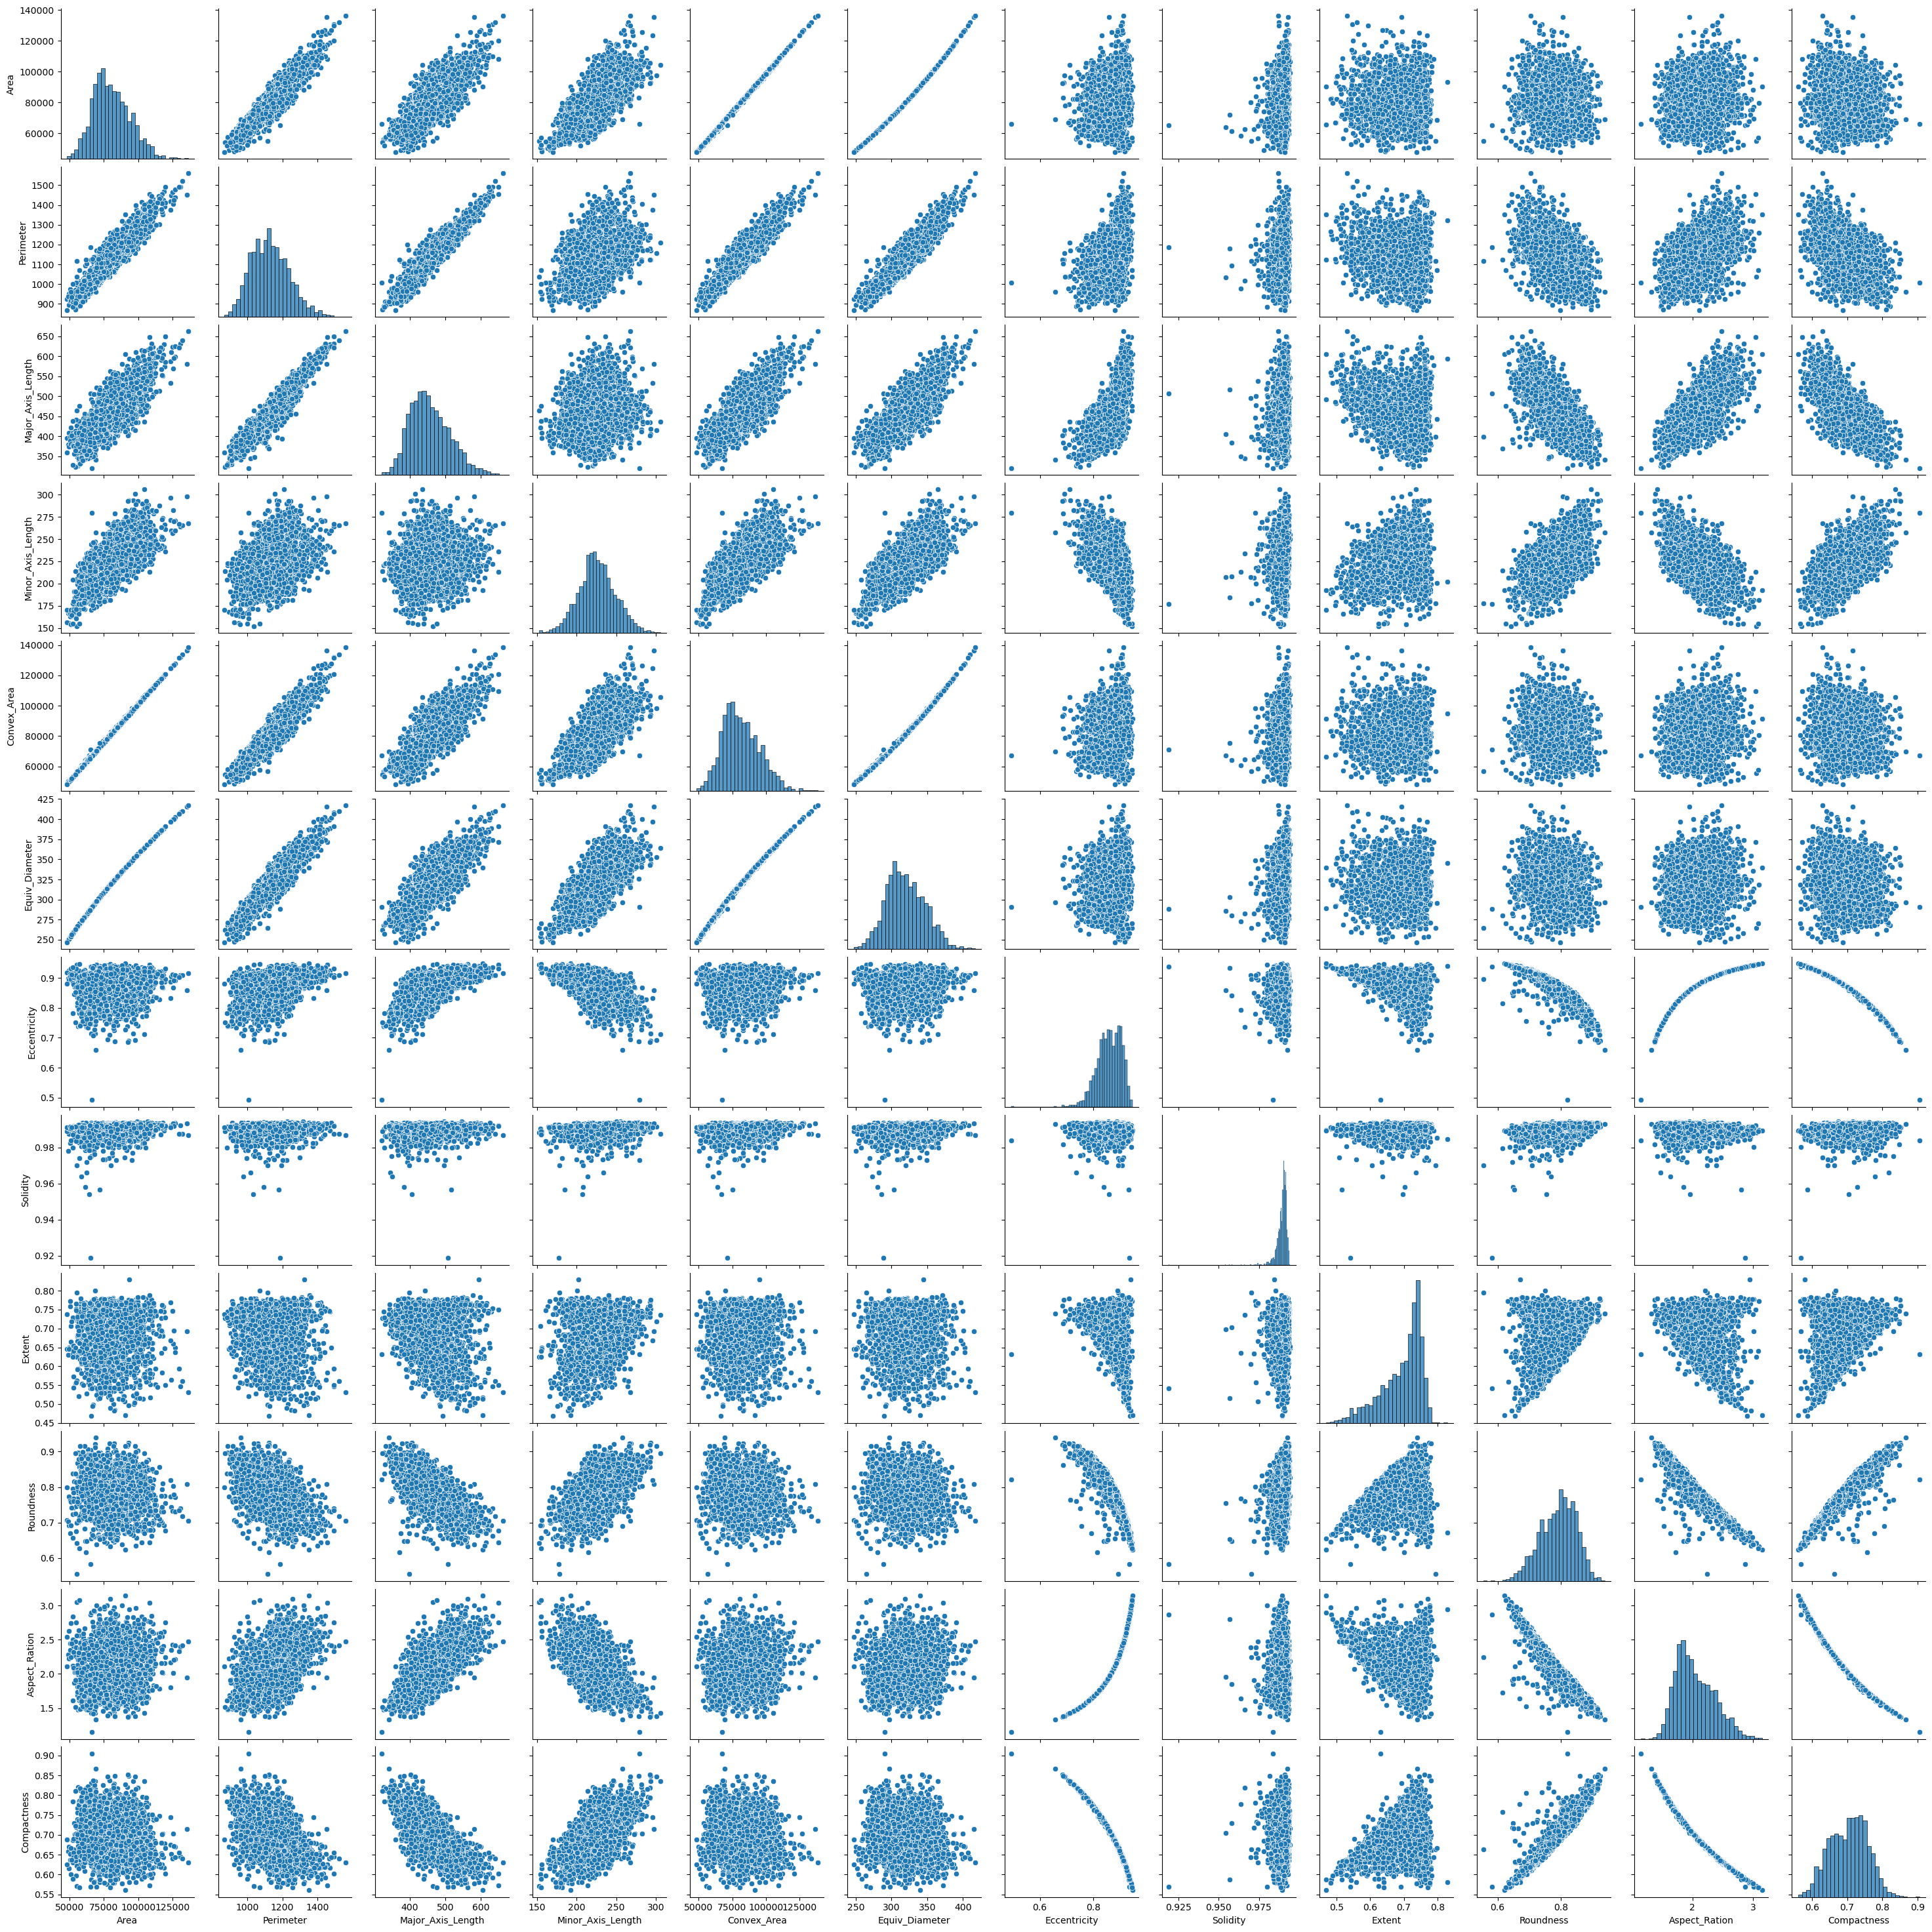

In [10]:
sns.pairplot(df)

Now lets convert Class column into boolean value in order to train the model

In [11]:
dummies = pd.get_dummies(df.Class,drop_first=True)
numeric_dummies = dummies.astype(int) 
numeric_dummies.head()

,Ürgüp Sivrisi
0,0
1,0
2,0
3,0
4,0


In [12]:
all_data = pd.concat([df,numeric_dummies],axis=1)
all_data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class,Ürgüp Sivrisi
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik,0
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik,0
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik,0
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik,0
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik,0


In [13]:
all_data = all_data.drop('Class',axis = 1)
all_data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Ürgüp Sivrisi
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,0
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,0
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,0
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,0
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,0


Let's check whether our data is balanced or not. 
As we can observe the below data the data is balanced.

In [24]:
all_data['Ürgüp Sivrisi'].value_counts()

Ürgüp Sivrisi
0    1300
1    1200
Name: count, dtype: int64

Here we can observe that the data is balanced.

In [21]:
all_data_area = all_data.groupby('Ürgüp Sivrisi')['Area'].mean()
all_data_area

Ürgüp Sivrisi
0    78423.154615
1    83079.542500
Name: Area, dtype: float64

In [22]:
all_data_Perimeter = all_data.groupby('Ürgüp Sivrisi')['Perimeter'].mean()
all_data_Perimeter

Ürgüp Sivrisi
0    1089.522488
1    1174.431919
Name: Perimeter, dtype: float64

In [23]:
all_data_Major_Axis_Length = all_data.groupby('Ürgüp Sivrisi')['Major_Axis_Length'].mean()
all_data_Major_Axis_Length

Ürgüp Sivrisi
0    426.272615
1    489.458501
Name: Major_Axis_Length, dtype: float64

# LOGISTIC REGRESSION

In [26]:
X = all_data.drop('Ürgüp Sivrisi', axis = 1)
y = all_data['Ürgüp Sivrisi']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state =1)

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\sai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
y_predicted = model.predict(X_test)

In [32]:
model.predict_proba(X_test)

array([[0.37495736, 0.62504264],
       [0.86290903, 0.13709097],
       [0.53799305, 0.46200695],
       ...,
       [0.53716101, 0.46283899],
       [0.56155096, 0.43844904],
       [0.05059585, 0.94940415]])

In [33]:
model.score(X_test,y_test)

0.868

From the above data we can tell that the model accuracy is 86%

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [34]:
confusion_matrix(y_test,y_predicted)

array([[336,  43],
       [ 56, 315]], dtype=int64)

In [35]:
cmt = confusion_matrix(y_test,y_predicted,labels = [0,1])
print(cmt)

[[336  43]
 [ 56 315]]


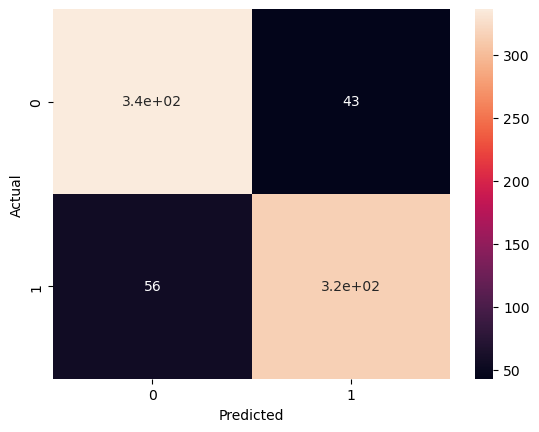

In [36]:
import seaborn as sns
sns.heatmap(cmt,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [37]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       379
           1       0.88      0.85      0.86       371

    accuracy                           0.87       750
   macro avg       0.87      0.87      0.87       750
weighted avg       0.87      0.87      0.87       750



In [38]:
fpr,tpr,thresholds = roc_curve(y_test,y_predicted)  # Calculate ROC curve

In [39]:
roc_auc = auc(fpr,tpr)      # Calculate AUC (AREA UNDER CURVE)

In [40]:
print("AUC = ",roc_auc)

AUC =  0.8678000696968189


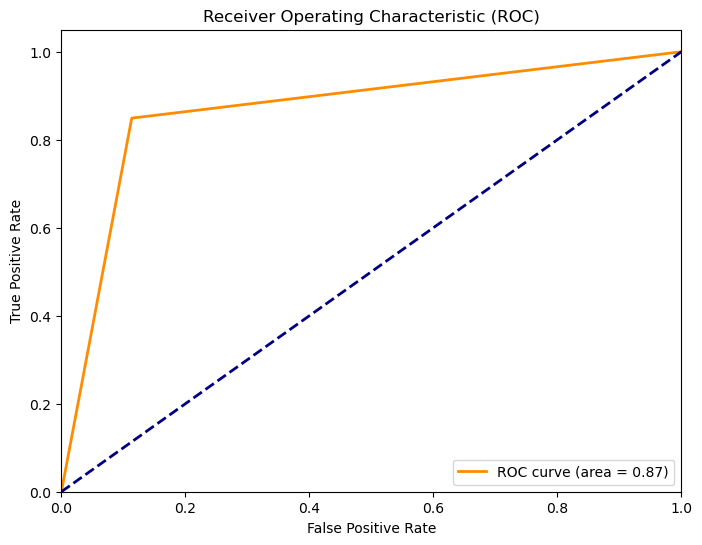

In [41]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

From the above chart we can observe that the area under curve is 0.87 so the model is good

In [42]:
model.coef_

array([[ 3.09790092e-03,  1.80298535e-02,  3.26748739e-02,
        -8.12500959e-02, -3.04834960e-03, -5.72348712e-02,
        -4.75590680e-05, -1.76122387e-04, -2.48323226e-04,
        -4.47525645e-04,  7.15754824e-04, -2.98785739e-04]])

In [43]:
model.intercept_

array([-0.00017477])